<a href="https://colab.research.google.com/github/roy-sub/Machine-Learning-Bootcamp/blob/main/Convolutional_Neural_Networks_in_TensorFlow_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the first course, you learned how to use TensorFlow to implement a basic neural network, going up all the way to basic Convolutional Neural Network. In this second course, you go much further.

In the first week, you take the ideas you've learned, and apply them to a much bigger dataset of cats versus dogs on Kaggle. One of the things that working with a larger dataset, then helps with is over-fitting. So with a smaller dataset, you are at great risk of overfitting; with a larger dataset, then you have less risk of over-fitting, but overfitting can still happen. 

Then in week two, you'll learn another method for dealing with overfitting, which is that TensorFlow provides very easy to use tools for data augmentation, where you can, for example, take a picture of a cat, and if you take the mirror image of the picture of a cat, it still looks like a cat. So why not do that, and throw that into the training set. Exactly. Or for example, you might only have upright pictures of cats, but if the cat's lying down, or it's on its side, then one of the things you can do is rotate the image. So It's like part of the image augmentation, is rotation, skewing, flipping, moving it around the frame, those kind of things. One of the things I find really neat about it, is particularly if you're using a large public dataset, is then you flow all the images off directly, and the augmentation happens as it's flowing. So you're not editing the images themselves directly. You're not changing the dataset. It all just happens in memory. This is all done as part of TensorFlow's Image Generation class

So then too one of the other strategy, of course for avoiding overfitting, is to use existing models, and to have transfer learning. Yeah. So I don't think anyone has as much data as they wish, for the problems we really care about. So Transfer Learning, lets you download the neural network, that maybe someone else has trained on a million images, or even more than a million images. So take an inception network, that someone else has trained, download those parameters, and use that to bootstrap your own learning process, maybe with a smaller dataset.

Then finally in the fourth week, Multicast learning. Rather than doing two classes, like horses verses humans, or cats verses dogs, what if you have more than two classes, like class five rock, paper, scissors, that would be three classes, or inception would be 1,000 classes. So that the techniques of moving from two to more than two, be it three or be it a 1,000, are very very similar. So we're going to look at those techniques and we'll look at the code for that.

Data is messy, sometimes you find surprising things like pictures of people holding cats or multiple cats or surprising things in data. In this week, you get to practice with using TensorFlow to deal with all of these issues. Yeah, and it's like, so even for example, you might have some files that are zero length and they could be corrupt as a results. So it's like using your Python skills, using your TensorFlow skills to be able to filter them out. Building a convolutional net to be able to spot things like you mentioned, a person holding it up. So that's some of the things we'll do this week

It's also a nice exercise in looking at a larger  [Kaggle Dogs v Cats dataset](https://www.kaggle.com/c/dogs-vs-cats) dataset, downloading and preparing it for training, as well as handling some preprocessing of data. Even data like this which has been carefully curated for you can have errors -- as you'll notice with some corrupt images! Also, you may notice some warnings about missing or corrupt EXIF data as the images are being loaded into the model for training. Don't worry about this -- it won't impact your model!

One of the nice things with TensorFlow and Keras is that if you put your images into named subdirectories, an image generated will auto label them for you. So the cats and dogs dataset you could actually do that and you've already got a massive head start in building the classifier. Then you can subdivide that into a training set and a validation set. Then you can use image generators that appointed at those folders.



```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))   

```

To use an image generator, you should create an instance of one. If the data isn't already normalized, you can do that with the rescale parameter. You then call the flow from directory to get a generator object. For the training dataset, you will then point at the training directory and then specify the target size. In this case, the images are an all shapes and sizes. So we will resize them to 150 by 150 on the fly. We'll set the batch sizes to be 20. There's 2,000 images, so we'll use a 100 batches of 20 each. Because there are two classes that we want to classify for its still stays as a binary class mode.

```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

```

Similarly for validation, we set up a generator and pointed at the validation directory.

```
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

```

We can explore the convolutions and pooling and the journey of the image through them. It's very similar to what you saw with the horses and humans. It has three sets of convolutions followed by pooling. Of course, the image is 150 by 150. Similarly, there's a single neuron with a sigmoid activation on the output. The summary of the layers is very similar to before but note that the size changes. We start with 150 by 150. So the convolution reduces that to 148 by 148. From there, we'll go until we end up with 17 by 17 that we feed into the dense layers.



```
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
```

Compilation is as before. Now remember you can tweak the learning rate by adjusting the lr parameter



```
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )
```

So now to train, and we can call model.fit generator and pass it the training generator and the validation generator.

**Image Data Generator -** [Resource I](https://medium.datadriveninvestor.com/keras-imagedatagenerator-methods-an-easy-guide-550ecd3c0a92), [Resource II](https://towardsdatascience.com/image-data-generators-in-keras-7c5fc6928400), [Resource III](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)


**Lab I -** [Using more sophisticated images with Convolutional Neural Networks](https://colab.research.google.com/drive/1jXd_qZVtQk7hLEV2BlBjhMEeX8VGNXpt?usp=sharing)


**Training vs Testing vs Validation Sets -** [Link](https://towardsdatascience.com/training-vs-testing-vs-validation-sets-a44bed52a0e1#:~:text=To%20summarise%2C%20the%20training%20set,order%20to%20perform%20model%20selection.)

**Note -** Now what do you think the impact of cropping might've had on training? Would that have trained the model to show that this was a cat better than an uncropped image. That's food for thought, and something to explore in the next lesson

**Note -** Using more data should help with overfitting, but there are some other techniques that you can use with smaller data sets too. And we’ll see them in next week’s lesson!



Image Augmentation is a very simple, but very powerful tool to help you avoid overfitting your data. The concept is very simple though: If you have limited data, then the chances of you having data to match potential future predictions is also limited, and logically, the less data you have, the less chance you have of getting accurate predictions for data that your model hasn't yet seen. To put it simply, if you are training a model to spot cats, and your model has never seen what a cat looks like when lying down, it might not recognize that in future.

Augmentation simply amends your images on-the-fly while training using transforms like rotation. So, it could 'simulate' an image of a cat lying down by rotating a 'standing' cat by 90 degrees. As such you get a cheap way of extending your dataset beyond what you have already. 

To learn more about Augmentation, and the available transforms, check out thr [link](https://keras.io/api/layers/preprocessing_layers/) and note that it's referred to as preprocessing for a very powerful reason: that it doesn't require you to edit your raw images, nor does it amend them for you on-disk. It does it in-memory as it's performing the training, allowing you to experiment without impacting your dataset. 

You can see more about the different APIs at the Keras site [here](https://keras.io/preprocessing/image/)

So if you remember the image generator class that we used earlier, it actually has the ability to do this for you. Indeed, you have already done a little image augmentation with it when you're re-scaled upon loading. That saved you from converting all of your images on the file system and then loading them in, you just re-scaled on the fly. So let's take a look at some of the other options.

```
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

```

- Here's how you could use a whole bunch of image augmentation options with the image generator adding onto re-scale. Rotation range is a range from 0-180 degrees with which to randomly rotate images. So in this case, the image will rotate by random amount between 0 and 40 degrees. 

- Shifting, moves the image around inside its frame. Many pictures have the subject centered. So if we train based on those kind of images, we might over-fit for that scenario. These parameters specify, as a proportion of the image size, how much we should randomly move the subject around. So in this case, we might offset it by 20 percent vertically or horizontally. 

- Shearing is also quite powerful. It will shear the image by random amounts up to the specified portion in the image. So in this case, it will shear up to 20 percent of the image. 

- Zoom can also be very effective. For example, consider the image on the right. It's obviously a woman facing to the right. Our image on the left is from the humans or horses training set. It's very similar but it zoomed out to see the full person. If we zoom in on the training image, we could end up with a very similar image to the one on the right. Thus, if we zoom while training, we could spot more generalized examples like this one. So you zoom with code like this. The 0.2 is a relative portion of the image you will zoom in on. So in this case, zooms will be a random amount up to 20 percent of the size of the image. 

- Another useful tool is horizontal flipping. So for example, if you consider the picture on the right, we might not be able to classify it correctly as our training data doesn't have the image of a woman with her left hand raised, it does have the image on the left, where the subjects right arm is raised. So if the image were flipped horizontally, then it becomes more structurally similar to the image on the right and we might not over-fit to right arm raisers. To turn on random horizontal flipping, you just say horizontal_flip equals true and the images will be flipped at random. 

- Finally, we just specify the fill mode. This fills in any pixels that might have been lost by the operations. I'm just going to stick with nearest here, which uses neighbors of that pixel to try and keep uniformity. Check the carets documentation for some other options. So that's the concept of image augmentation.

**Lab -** [Data Augmentation on the Cats or Dogs Dataset](https://colab.research.google.com/drive/1GIu0qdgn0vvfq5NzHHGlIObWKPbw093_?usp=sharing)

**Lab -** [Data Augmentation on the Horses or Humans Dataset](https://colab.research.google.com/drive/1fk3KWTlNt98QaK1AGO-KqMkc2JLpXLr2?usp=sharing)

Of course, image augmentation isn't the magic bullet to cure overfitting. It really helps to have a massive diversity of images. So for example, if we look at the horses or humans data set and train it for the same epochs, then we can take a look at its behavior. So I'm going to start training and show all 100 epochs. I sped it up a bit to save your time. As you watch, you'll see the test accuracy climbing steadily. At first, the validation accuracy seems to be in step, but then you'll see it varying wildly. What's happening here is that despite the image augmentation, the diversity of images is still too sparse and the validation set may also be poorly designed, namely that the type of image in it is too close to the images in the training set. If you inspect the data for yourself you'll see that's the case. For example, the humans are almost always standing up and in the center of the picture, in both the training and validation sets, so augmenting the image will change it to look like something that doesn't look like what's in the validation set. So by the time the training has completed, we can see the same pattern. The training accuracy is trending towards 100 percent, but the validation is fluctuating in the 60s and 70s. Let's plot this, we can see that the training accuracy climbs steadily in the way that we would want, but the validation fluctuated like crazy. So what we can learn from this is that the image augmentation introduces a random element to the training images but if the validation set doesn't have the same randomness, then its results can fluctuate like this. So bear in mind that you don't just need a broad set of images for training, you also need them for testing or the image augmentation won't help you very much.



Transfer learning is one of the most important techniques of deep learning and TensorFlow lets you do that with just a handful of lines of codes. Rather than needing to train a neural network from scratch we can need a lot of data and take a long time to train, you can instead download maybe an open-source model that someone else has already trained on a huge dataset maybe for weeks and use those parameters as a starting point to then train your model just a little bit more on perhaps a smaller dataset that you have for a given task, so it is called transfer learning.

In the previous lessons, you looked at building a binary classifier that predicted cats versus dogs or horses versus humans. You also saw how overfitting can occur and explored some practices for avoiding it. The problem with these of course, is that the training data was very small, and there's only so many common features that can be extracted, even if we do some tricks like image augmentation. But in both these cases, you built the model from scratch. What if you could take an existing model that's trained on far more data, and use the features that that model learned? That's the concept of transfer learning, and we'll explore that in this lesson.

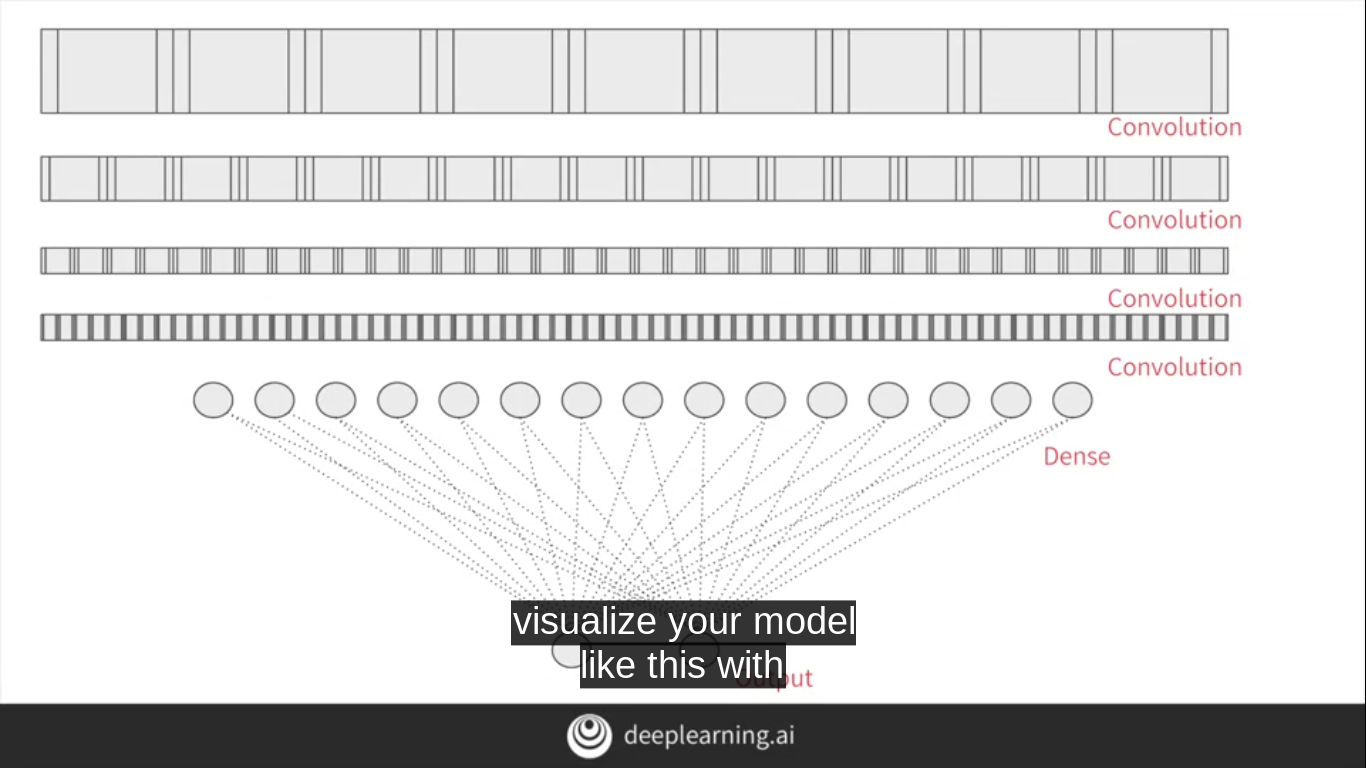

So for example, if you visualize your model like this with a series of convolutional layers before dense layer leads your output layer, you feed your data into the top layer, the network learns the convolutions that identify the features in your data and all that.

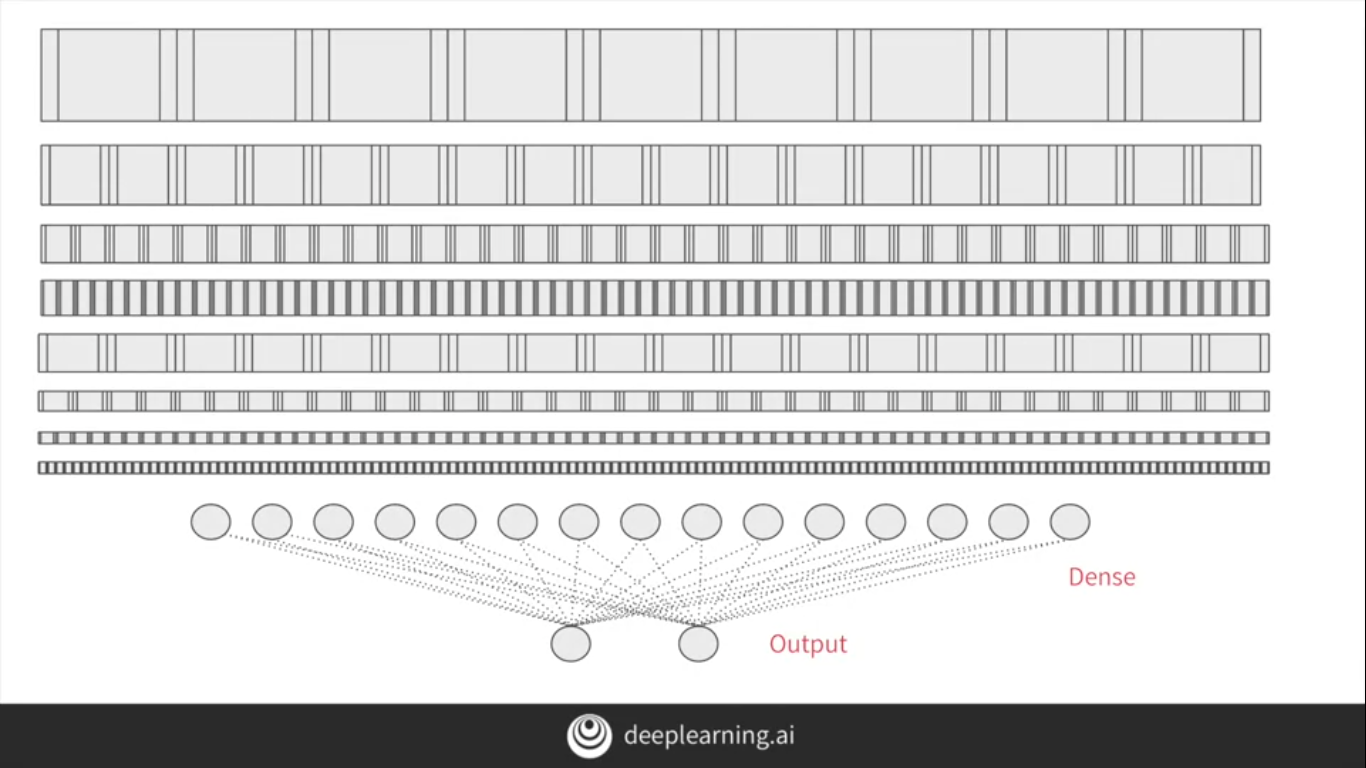

But consider somebody else's model, perhaps one that's far more sophisticated than yours, trained on a lot more data. They have convolutional layers and they're here intact with features that have already been learned. So you can lock them instead of retraining them on your data, and have those just extract the features from your data using the convolutions that they've already learned. Then you can take a model that has been trained on a very large datasets and use the convolutions that it learned when classifying its data. If you recall how convolutions are created and used to identify particular features, and the journey of a feature through the network, it makes sense to just use those, and then retrain the dense layers from that model with your data.

Of course, well, it's typical that you might lock all the convolutions. You don't have to. You can choose to retrain some of the lower ones too because they may be too specialized for the images at hand. It takes some trial and error to discover the right combination.

So let's take a well-trained state of the art model. There's one called [Inception](https://towardsdatascience.com/deep-learning-understand-the-inception-module-56146866e652), which you can learn more about at his site. This has been pre-trained on a dataset from [ImageNet](https://www.image-net.org/), which has 1.4 million images in a 1000 different classes.

For more on how to freeze/lock layers, explore the documentation, which includes an example using MobileNet architecture : [link](https://www.tensorflow.org/tutorials/images/transfer_learning)

**Code -*** So let's take a look at how we would achieve this in code.

```
from tensorflow.keras import layers
from tensorflow.keras import Model
```

We'll start with the inputs. In particular, we'll be using the keras `layers` API, to pick at the layers, and to understand which ones we want to use, and which ones we want to retrain

```
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
```

A copy of the pretrained weights for the inception neural network is saved at this URL. Think of this as a snapshot of the model after being trained. It's the parameters that can then get loaded into the skeleton of the model, to turn it back into a trained model.



```
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)
```

So now if we want to use inception, it's fortunate that keras has the model definition built in. So you instantiate that with the desired input shape for your data, and specify that you don't want to use the built-in weights, but the snapshot that you've just downloaded. The inception V3 has a fully-connected layer at the top. So by setting include_top to false, you're specifying that you want to ignore this and get straight to the convolutions. 

```
# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False
```

Now that I have my pretrained model instantiated, I can iterate through its layers and lock them, saying that they're not going to be trainable with this code.

```
pre_trained_model.summary()
```

You can then print a summary of your pretrained model with this code but be prepared, it's huge. There's no way I can fit it all in a slide, even if I use a two point font like this. This is probably less than 10 percent of the summary of the model. 



```
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
```
All of the layers have names, so you can look up the name of the last layer that you want to use. If you inspect the summary, you'll see that the bottom layers have convolved to 3 by 3. But I want to use something with a little more information. So I moved up the model description to find mixed7,
Play video starting at ::18 and follow transcript0:18
which is the output of a lot of convolution that are 7 by 7. You don't have to use this layer and is fun to experiment with others. But with this code, I'm going to grab that layer from inception and take it to output.



```
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)                 
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()
```
So now we'll define our new model, taking the output from the inception model's mixed7 layer, which we had called last_ouput. This should look exactly like the dense models that you created way back at the start of this course. The code is a little different, but this is just a different way of using the layers API. You start by flattening the input, which just happens to be the output from inception. And then add a Dense hidden layer. And then your output layer which has just one neuron activated by a sigmoid to classify between two items. You can then create a model using the Model abstract class. And passing at the input and the layers definition that you've just created.


```
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
```


And then you compile it as before with an optimizer and a loss function and the metrics that you want to collect.
Play video starting at :1:20 and follow transcript1:20
I won't go into all the codes to download cats versus dogs again, it's in the **Lab** if you want to use it.

**Note -** What's interesting if you do this, is that you end up with another but a different overfitting situation. While it started out well, the validation is diverging away from the training in a really bad way. So, how do we fix this?

**Using Dropout-** Another useful tool to explore at this point is the Dropout. The idea behind it is to remove a random number of neurons in your neural network. This works very well for two reasons: The first is that neighboring neurons often end up with similar weights, which can lead to overfitting, so dropping some out at random can remove this. The second is that often a neuron can over-weigh the input from a neuron in the previous layer, and can over specialize as a result. Thus, dropping out can break the neural network out of this potential bad habit ! Check out Andrew's terrific video explaining dropouts [here](https://www.youtube.com/watch?v=ARq74QuavAo)

In the previous lesson, we saw how to do transfer learning. But when we retrain the inception classifier features for cats versus dogs, we ended up over-fitting again. We also had augmentation, but despite that, we still suffered from over-fitting. So let's discuss some ways that we can avoid that in this lesson. Now here's the accuracy of our training set versus our validation set over 100 epochs. It's not very healthy.

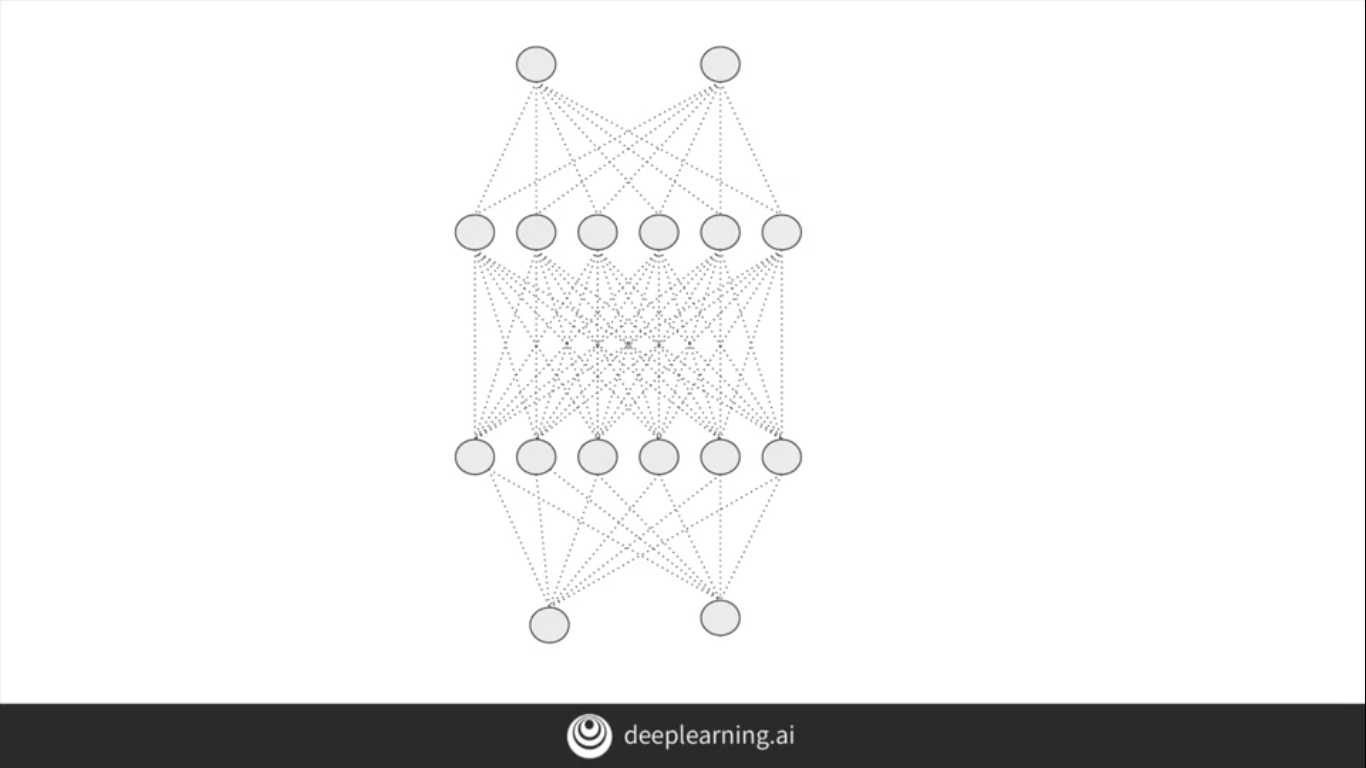

There's another layer take in Keras called a dropout. And the idea behind the dropout is that layers in a neural network can sometimes end up having similar weights and possible impact each other leading to over-fitting. With a big complex model like this, that's a risk. So if you can imagine the dense layers can look a little bit like this.There's another layer take in Keras called a dropout. And the idea behind the dropout is that layers in a neural network can sometimes end up having similar weights and possible impact each other leading to over-fitting. With a big complex model like this, that's a risk. So if you can imagine the dense layers can look a little bit like this.

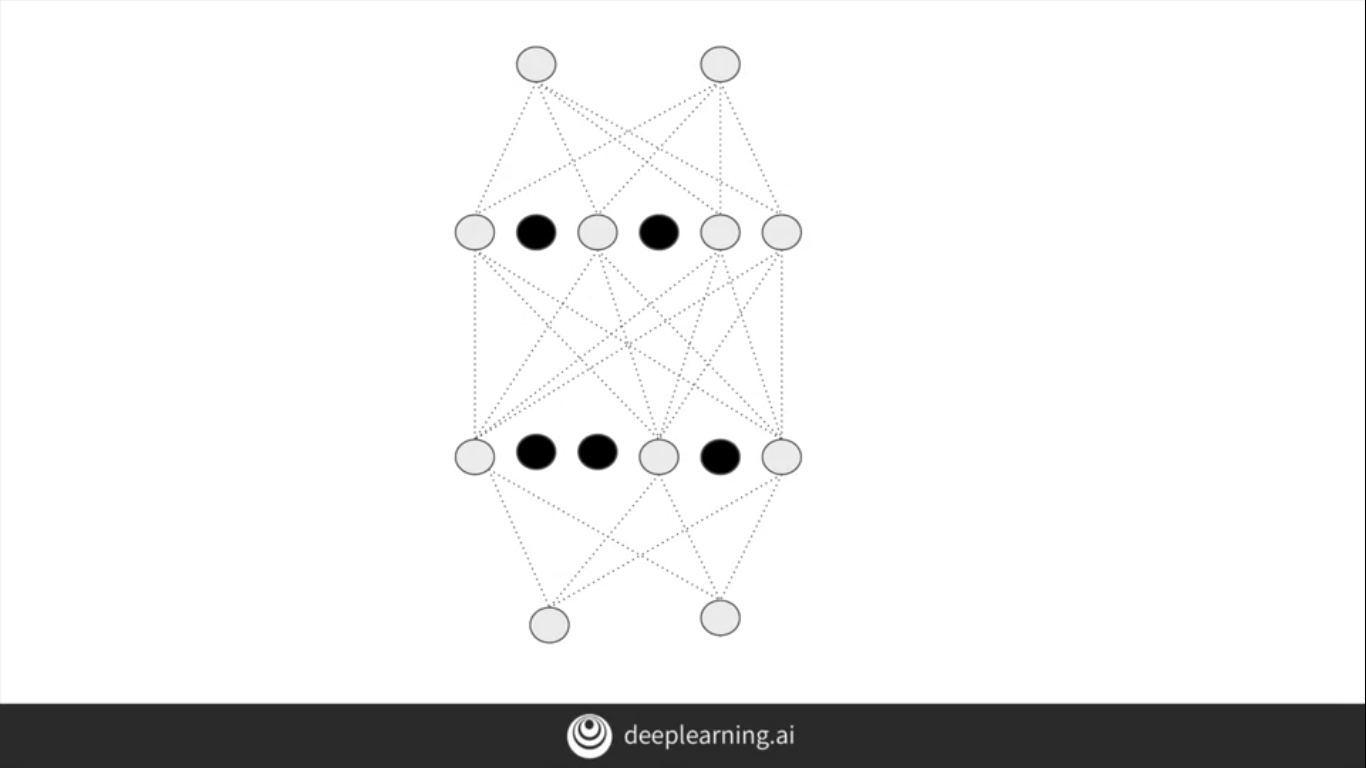

By dropping some out, we make it look like this. And that has the effect of neighbors not affecting each other too much and potentially removing overfitting. So how do we achieve this in code?



```
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()
```

Well, here's our model definition from earlier. And here's where we add the dropout. The parameter is between 0 and 1 and it's the fraction of units to drop.

**Lab -** [Transfer Learning](https://colab.research.google.com/drive/1B0x3P78nl13pafypPXAjNocGV_EicDQa?usp=sharing)

**Introducing the Rock-Paper-Scissors dataset -** [Rock Paper Scissors](https://laurencemoroney.com/datasets.html) is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but its intent is primarily for learning and research.

Rock Paper Scissors contains images from a variety of different hands,  from different races, ages, and genders, posed into Rock / Paper or Scissors and labeled as such. You can download the [training set here](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip), and the [test set here](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip). These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images. I also generated a few images that you can use for predictions. You can find them [here](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip). Note that all of this data is posed against a white background. Each image is 300×300 pixels in 24-bit color



```
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)
```
Once your directory is set up, you need to set up your image generator. Here's the code that you used earlier but, note the class mode was set to binary. For multiple classes, you'll have to change this to categorical like this.



```
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()
```
 The next change comes in your model definition where you'll need to change the output layer. For a binary classifier, it was more efficient for you to just have one neuron and use a sigmoid function to activate it. This meant that it would output close to zero for one class and close to one for the other. Now, that doesn't fit for multi-class, so we need to change it, but it's pretty simple. Now, we have an output layer that has three neurons, one for each of the classes rock, paper, and scissors, and it's activated by softmax which turns all the values into probabilities that will sum up to one.



```
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
```

The final change then comes when you compile your network. If you recall with the earlier examples, your loss function was binary cross entropy. Now, you'll change it's a categorical cross entropy like this. There are other categorical loss functions including sparse categorical, cross entropy that you used in the fashion example, and you can of course also use those.

**Note -** By the time we finish, the training data is above 98% and the validation data is at 95 percent accuracy. This is highly specialized data that's optimized for this lesson and not a great [real-world scenario](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip) for Rock, Paper, and Scissors. I'll discuss why in a moment.

**Lab -** [Multi-class Classifier](https://colab.research.google.com/drive/1mweEs6HEE6oIZ31PphgJrBp-lH5C7zaG?usp=sharing)

